# Market Response
This notebook tries to see how global markets respond to local shortages.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import remove_f_years, yearly_trade, yearly_trade_by_country

## Loading the datasets
Loads the datasets into panda dataframes

In [2]:
df_trade_matrix = pd.read_csv('../data/Trade_DetailedTradeMatrix_E_All_Data.csv', encoding = 'ISO-8859-1')
df_prod = pd.read_csv('../data/Production_Crops_E_All_Data.csv', encoding = 'ISO-8859-1')

/Users/Niels/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Looking at production of different items over the years
Check food production to find shortages of locally produced foods

In [3]:
df_trade_matrix = remove_f_years(df_trade_matrix)
df_prod_ch = remove_f_years(df_prod[df_prod['Area'] == 'Switzerland'])
df_prod_ch['Item'].value_counts().index

Index(['Asparagus', 'Rapeseed', 'Treenuts,Total', 'Fruit Primary',
       'Fruit, fresh nes', 'Kiwi fruit', 'Melons, other (inc.cantaloupes)',
       'Cereals (Rice Milled Eqv)', 'Oilseeds nes', 'Triticale',
       'Carrots and turnips', 'Peaches and nectarines', 'Grapes', 'Artichokes',
       'Oilcrops, Oil Equivalent', 'Oats', 'Raspberries',
       'Oilcrops, Cake Equivalent', 'Plums and sloes',
       'Pumpkins, squash and gourds', 'Blueberries', 'Garlic',
       'Onions, shallots, green', 'Linseed', 'Cabbages and other brassicas',
       'Currants', 'Sugar beet', 'Leeks, other alliaceous vegetables',
       'Pulses,Total', 'Roots and Tubers,Total', 'Millet', 'Cherries',
       'Apples', 'Spinach', 'Berries nes', 'Onions, dry', 'Wheat',
       'Beans, green', 'Chillies and peppers, green', 'Rye', 'Soybeans',
       'Barley', 'Potatoes', 'Apricots', 'Sunflower seed', 'Pears',
       'Tobacco, unmanufactured', 'Cauliflowers and broccoli', 'Tomatoes',
       'Vegetables, leguminous nes

In [4]:
df_prod_ch[df_prod_ch['Item'] == 'Apples'].head()

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
31434,Switzerland,Apples,Area harvested,ha,2700.0,4800.0,3600.0,4000.0,2478.0,2530.0,...,4195.0,4226.0,4218.0,4187.0,4138.0,3993.0,3894.0,3863.0,3854.0,3806.0
31435,Switzerland,Apples,Yield,hg/ha,999259.0,1000833.0,998889.0,974000.0,1030670.0,1383399.0,...,607597.0,594070.0,478049.0,782183.0,564418.0,526243.0,594101.0,554621.0,589777.0,592805.0
31436,Switzerland,Apples,Production,tonnes,269800.0,480400.0,359600.0,389600.0,255400.0,350000.0,...,254887.0,251054.0,201641.0,327500.0,233556.0,210129.0,231343.0,214250.0,227300.0,225622.0


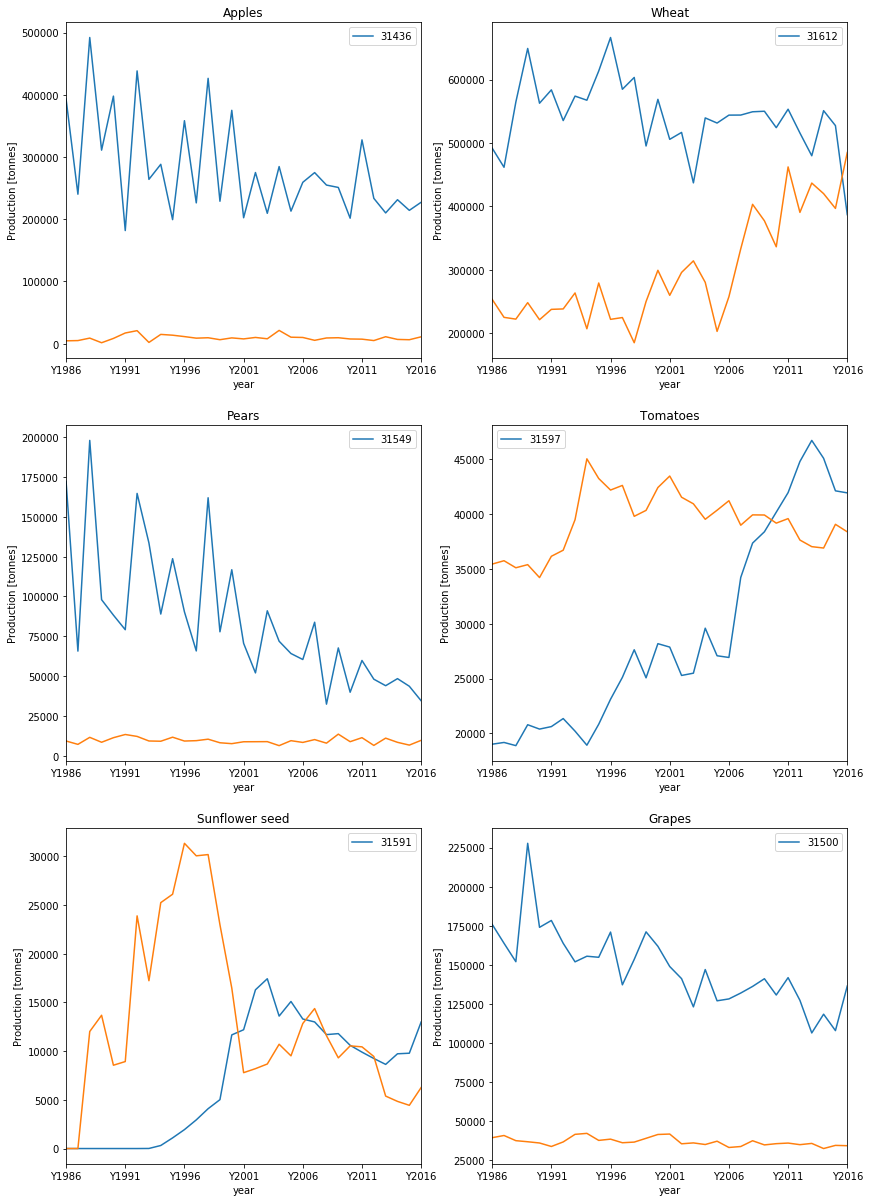

In [11]:
ITEMS = ['Apples', 'Wheat', 'Pears', 'Tomatoes', 'Sunflower seed','Grapes']

fig, axs = plt.subplots(3, 2, figsize=(14, 21))
axs = axs.reshape((-1,))

for idx, item in enumerate(ITEMS):
    axs[idx].set_title(f'{item}')
    axs[idx].set_xlabel(f'year')
    axs[idx].set_ylabel(f'Production [tonnes]')
    # Production
    df_prod_ch_item = df_prod_ch[df_prod_ch['Item'] == item]
    df_prod_ch_item = df_prod_ch_item[df_prod_ch_item['Unit'] == 'tonnes']
    df_prod_ch_item = df_prod_ch_item[[f'Y{label}' for label in range(1986, 2017)]]
    df_prod_ch_item = df_prod_ch_item.transpose()
    df_prod_ch_item.plot(ax=axs[idx])
    # Import
    df_import_ch_item = yearly_trade_by_country(df_trade_matrix, 'Switzerland', item)['Imports']
    df_import_ch_item.plot(ax=axs[idx])
    # Prices
    
plt.show()